**Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.**

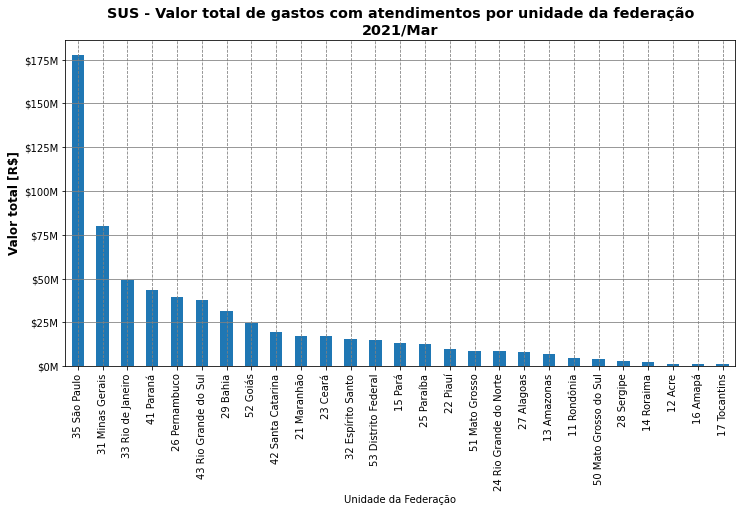

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

dados = pd.read_csv("/content/A213524189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, 
                    thousands=".", decimal=",", engine='python')

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")

ordenado_por_total = usaveis.sort_values("Total", ascending=False)#ordena
ordenado_por_total = ordenado_por_total.drop("Total",axis=1)#retira coluna Total

#retira pico máximo para ajustar a escala
ordenado_por_total = ordenado_por_total.drop(ordenado_por_total.loc['35 São Paulo'].idxmax(),axis=1)

mes_mais_recente = ordenado_por_total.columns[-1] #ultimo mes

ax = ordenado_por_total[mes_mais_recente].sort_values(ascending=False).plot(figsize=(12,6), kind='bar')

#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.2f}M"))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}M'.format(x/1000000)))
ax.grid(b=True, axis='y', which='major', color='grey', linestyle='-')
ax.grid(b=True, axis='x', which='major', color='grey', linestyle='--')
#plt.grid()

plt.title('SUS - Valor total de gastos com atendimentos por unidade da federação\n' + mes_mais_recente, weight='bold', fontsize='x-large' )
plt.ylabel("Valor total [R$]",weight='bold',fontsize='large')
plt.show()